## Workflow

1. Do things one by one, iterated and saw results
1. Combined all the data prep into one cell and then re-ran to make sure everything works
1. Converted the cell to a function
1. Change our code to use the function
1. Restart kernal and re-run
1. Move the function to a py script
1. Import the function in the notebook and test it out (restart and re-run notebook)

In [ ]:
import ts_acquire
import prepare

In [ ]:
df = ts_acquire.get_store_data()

In [ ]:
df = prepare.prep_store_data(df)

In [ ]:
df.head()

In [ ]:
# .hist shows a histogram of *all* the columns
# subset b/c we don't want every column in the output
df[['quantity', 'item_price']].hist()

In [ ]:
df.head()

## OPSD Data

In [1]:
import pandas as pd
import ts_acquire
import prepare

In [2]:
df = ts_acquire.opsd_germany_daily()
df = prepare.prep_opsd_data(df)

shape: (4383, 6)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcc8d63e50>,
      dtype=object)

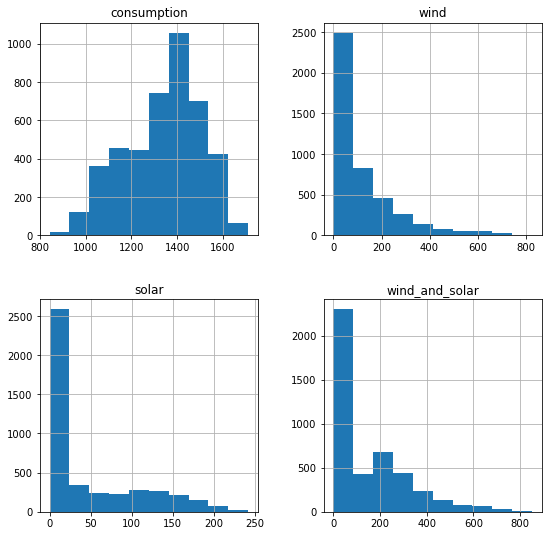

In [3]:
print('shape:', df.shape)
df.drop(columns=['month', 'year']).hist(figsize=(9, 9))

In [4]:
df

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [11]:
everything_matches = df.wind + df.solar == df.wind_and_solar
everything_matches

date
2006-01-01     True
2006-01-02     True
2006-01-03     True
2006-01-04     True
2006-01-05     True
              ...  
2017-12-27     True
2017-12-28     True
2017-12-29     True
2017-12-30    False
2017-12-31    False
Length: 4383, dtype: bool

In [12]:
everything_matches.all()

False

`.all()` returns true when *all* the values are True.

Because this is false, I know there is at least one false in that series.

In [10]:
mask = df.wind + df.solar != df.wind_and_solar

df.assign(wind_and_solar2=df.wind + df.solar)[mask]

,consumption,wind,solar,wind_and_solar,month,year,wind_and_solar2
date,,,,,,,
2010-01-01,1057.37200,48.709,0.000,0.000,1,2010,48.709
2010-01-02,1161.04200,24.628,0.000,0.000,1,2010,24.628
2010-01-03,1132.06900,22.963,0.000,0.000,1,2010,22.963
2010-01-04,1346.25000,59.318,0.000,0.000,1,2010,59.318
2010-01-05,1457.37400,41.624,0.000,0.000,1,2010,41.624
...,...,...,...,...,...,...,...
2017-12-24,1141.75730,812.422,9.949,822.371,12,2017,822.371
2017-12-25,1111.28338,587.810,15.765,603.575,12,2017,603.575
2017-12-26,1130.11683,717.453,30.923,748.376,12,2017,748.376


Sanity Checks

- does wind+solar == wind + solar?

Question and verify the accuracy of any *derived* data.

The `Wind+Solar` column from the original dataframe does not equal the sum of the wind and solar columns for ~ 50% of the dataset.